In [119]:
import os
import numpy as np
from scipy import sparse
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import QuantileRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import SGDRegressor
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import graphviz
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format = 'svg'

In [2]:
X, y = make_blobs()
X, y

(array([[ -3.40632738,  -8.49676899],
        [ -3.34782493,  -2.62712272],
        [  0.61898299,  -9.92776954],
        [  1.53560036,  -8.29937657],
        [ -3.17948208,  -2.18398462],
        [ -1.81058054,  -7.69464134],
        [ -2.90460289,  -9.3313189 ],
        [ -2.73798846,  -3.85416217],
        [  1.42281343,  -8.69044976],
        [  1.41143031,  -9.66950605],
        [ -1.91203433,  -8.51846697],
        [ -4.05154302,  -4.2253412 ],
        [ -1.59160712,  -5.72468657],
        [ -4.1810294 ,  -3.17546362],
        [ -2.77803494,  -4.65002211],
        [  2.10279198,  -7.5677595 ],
        [ -2.44944433,  -8.32241943],
        [ -2.84815973,  -5.62315183],
        [ -3.63067105,  -8.17465885],
        [ -4.21725028,  -4.6699329 ],
        [ -1.29388039,  -2.96826853],
        [ -3.79353423,  -4.90347415],
        [ -3.8031793 ,  -2.48113267],
        [ -4.26225862,  -4.03835602],
        [ -2.90719579,  -7.99504285],
        [ -3.90236113,  -3.90046902],
        [ -3

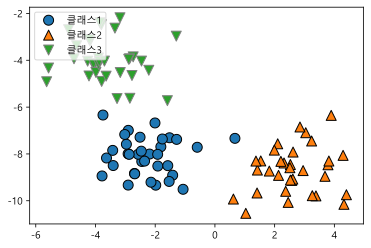

In [3]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(['클래스1', '클래스2', '클래스3'], loc=2)

In [4]:
X.shape

(100, 2)

In [5]:
X, y = mglearn.datasets.make_wave(n_samples=100)
X, y

(array([[-0.75275929],
        [ 2.70428584],
        [ 1.39196365],
        [ 0.59195091],
        [-2.06388816],
        [-2.06403288],
        [-2.65149833],
        [ 2.19705687],
        [ 0.60669007],
        [ 1.24843547],
        [-2.87649303],
        [ 2.81945911],
        [ 1.99465584],
        [-1.72596534],
        [-1.9090502 ],
        [-1.89957294],
        [-1.17454654],
        [ 0.14853859],
        [-0.40832989],
        [-1.25262516],
        [ 0.67111737],
        [-2.16303684],
        [-1.24713211],
        [-0.80182894],
        [-0.26358009],
        [ 1.71105577],
        [-1.80195731],
        [ 0.08540663],
        [ 0.55448741],
        [-2.72129752],
        [ 0.64526911],
        [-1.97685526],
        [-2.60969044],
        [ 2.69331322],
        [ 2.7937922 ],
        [ 1.85038409],
        [-1.17231738],
        [-2.41396732],
        [ 1.10539816],
        [-0.35908504],
        [-2.26777059],
        [-0.02893854],
        [-2.79366887],
        [ 2

Text(0, 0.5, '타깃')

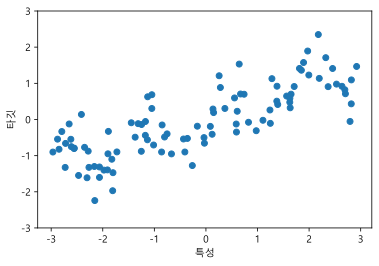

In [6]:
plt.scatter(X, y)
plt.ylim(-3, 3)
plt.xlabel('특성')
plt.ylabel('타깃')

In [7]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [8]:
cancer['data'].shape

(569, 30)

In [9]:
{n: v for n, v in zip(cancer['target_names'], np.bincount(cancer['target']))}

{'malignant': 212, 'benign': 357}

In [10]:
np.bincount(cancer['target'])

array([212, 357], dtype=int64)

In [11]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [12]:
boston = load_boston()
boston

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [13]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [14]:
boston['data'].shape

(506, 13)

In [15]:
X, y = mglearn.datasets.load_extended_boston()

In [16]:
X.shape

(506, 104)

In [17]:
X, y = make_blobs()
X, y

(array([[ 6.80906357,  0.6336737 ],
        [-4.57673565,  6.95966679],
        [ 0.73240691,  0.03415391],
        [ 6.76133954,  0.51561475],
        [ 6.00328954,  0.96534366],
        [-6.60445428,  7.43910446],
        [-5.69912137,  5.80373182],
        [-6.74797082,  7.14876655],
        [ 1.43470292,  2.00601308],
        [-6.41748325,  9.43545119],
        [ 2.27762097,  0.6474124 ],
        [ 0.70091315, -0.0248472 ],
        [ 0.77148313,  3.60664007],
        [-7.67091671,  6.40266486],
        [ 1.97061889, -0.05479225],
        [ 4.01918226,  1.36959833],
        [ 4.58736299,  0.53600854],
        [ 0.78690258,  2.401548  ],
        [-4.73733852,  7.16734636],
        [ 5.80569271,  0.41774919],
        [ 2.11624354,  1.20705323],
        [-5.62821022,  7.25776082],
        [-5.67418809,  8.77631015],
        [ 5.22059393,  1.46559965],
        [ 1.84941213,  1.6249785 ],
        [-7.47215564,  7.72287914],
        [ 5.3068592 ,  1.58121015],
        [-6.19753173,  7.106

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train, y_train

(array([[ 0.25888138,  3.80118652],
        [-5.69912137,  5.80373182],
        [ 0.71991987,  2.39775518],
        [ 5.07313814,  0.42817304],
        [ 6.04529419,  0.74082729],
        [-6.57875004,  8.21795902],
        [-6.54429235,  6.64240506],
        [-4.63633061,  7.48026875],
        [ 7.43017426,  2.63231106],
        [ 2.03912905,  3.00103172],
        [-6.19753173,  7.10651881],
        [-4.73733852,  7.16734636],
        [ 0.88360041,  0.46477885],
        [ 1.02699873,  1.56896129],
        [-0.30999707,  1.34385906],
        [-4.57673565,  6.95966679],
        [ 3.78950317, -0.56369591],
        [ 6.57488931,  0.82028891],
        [ 1.45736796,  2.53173895],
        [ 6.00328954,  0.96534366],
        [ 4.01918226,  1.36959833],
        [ 0.78690258,  2.401548  ],
        [-5.28502782,  8.64760615],
        [ 0.95090616,  2.87121859],
        [-6.60445428,  7.43910446],
        [-6.66999258,  9.16514339],
        [ 5.98169998,  0.79469066],
        [ 6.80906357,  0.633

In [19]:
knn = KNeighborsClassifier(n_neighbors=3)

In [20]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [21]:
knn.predict(X_test)

array([2, 1, 0, 2, 1, 0, 2, 2, 1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       2, 0, 0])

In [22]:
np.mean(knn.predict(X_test) == y_test)

1.0

In [23]:
knn.score(X_test, y_test)

1.0

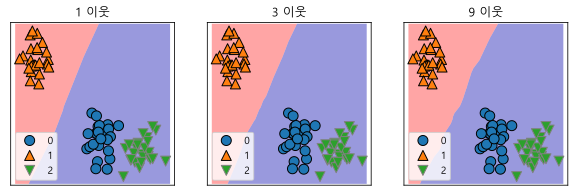

In [24]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axs):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    # 이지분리에서만 사용이 가능한 plot 형태인듯?
    mglearn.plots.plot_2d_separator(knn, X_train, fill=True, eps=0.5, alpha=0.4, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
    ax.set_title(f'{n_neighbors} 이웃')
    ax.legend(loc=3)

In [25]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], random_state=66)
X_train, X_test, y_train, y_test

(array([[1.294e+01, 1.617e+01, 8.318e+01, ..., 8.388e-02, 3.297e-01,
         7.834e-02],
        [1.458e+01, 2.153e+01, 9.741e+01, ..., 2.701e-01, 4.264e-01,
         1.275e-01],
        [1.129e+01, 1.304e+01, 7.223e+01, ..., 8.750e-02, 2.733e-01,
         8.022e-02],
        ...,
        [2.425e+01, 2.020e+01, 1.662e+02, ..., 2.248e-01, 3.222e-01,
         8.009e-02],
        [1.364e+01, 1.634e+01, 8.721e+01, ..., 8.586e-02, 2.346e-01,
         8.025e-02],
        [1.308e+01, 1.571e+01, 8.563e+01, ..., 7.283e-02, 3.184e-01,
         8.183e-02]]),
 array([[1.290e+01, 1.592e+01, 8.374e+01, ..., 1.012e-01, 3.549e-01,
         8.118e-02],
        [1.256e+01, 1.907e+01, 8.192e+01, ..., 9.265e-02, 2.121e-01,
         7.188e-02],
        [1.160e+01, 1.284e+01, 7.434e+01, ..., 8.449e-02, 2.772e-01,
         8.756e-02],
        ...,
        [1.613e+01, 2.068e+01, 1.081e+02, ..., 2.073e-01, 3.706e-01,
         1.142e-01],
        [1.278e+01, 1.649e+01, 8.137e+01, ..., 5.882e-02, 2.383e-01,
   

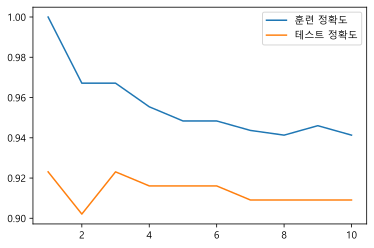

In [26]:
train_accuracy = []
test_accuracy = []
for i in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))
plt.plot(range(1, 11), train_accuracy, label='훈련 정확도')
plt.plot(range(1, 11), test_accuracy, label='테스트 정확도')
plt.legend()

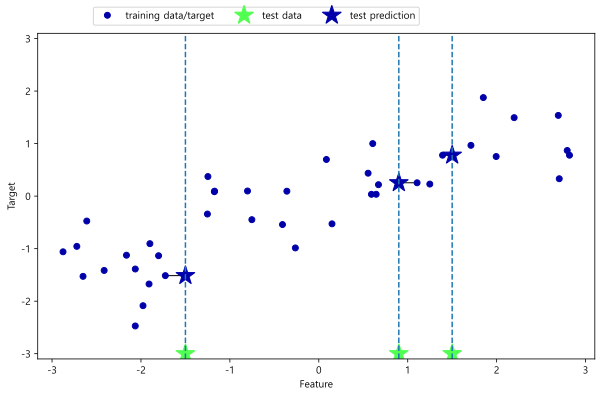

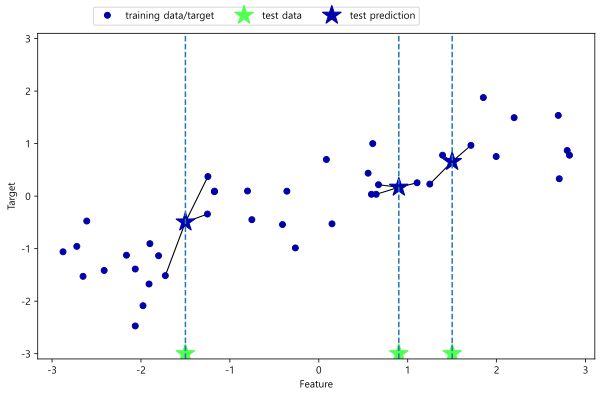

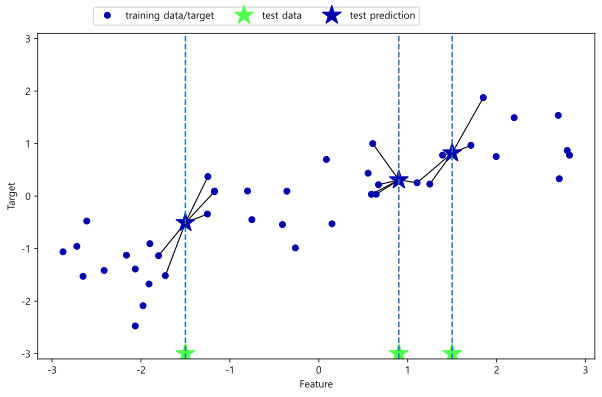

In [27]:
for n in [1, 3, 5]:
    mglearn.plots.plot_knn_regression(n_neighbors=n)

In [28]:
X, y = mglearn.datasets.make_wave(n_samples=100)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [30]:
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [31]:
reg.predict(X_test)

array([-0.79266538,  0.42776943,  0.42776943,  1.11237602,  0.42776943,
        0.89609343,  0.00297044,  1.33380525,  0.66577669, -0.34456666,
        1.65825902,  0.46201371, -0.59416201, -0.79266538,  1.7619226 ,
        0.66577669, -0.35075036, -0.53657219,  0.52456939,  0.66577669,
        1.11237602,  1.33380525,  0.66577669, -0.79266538,  0.19927087])

In [32]:
# 회귀에서는 score가 결정계수(R-square)
reg.score(X_test, y_test)

0.6706208209942042

In [33]:
r_square = []
for n in [1, 3, 5, 7, 9, 11]:
    reg = KNeighborsRegressor(n_neighbors=n)
    reg.fit(X_train, y_train)
    r_square.append(reg.score(X_test, y_test))
r_square

[0.61919257050849,
 0.6706208209942042,
 0.7501149638643652,
 0.7333625407973601,
 0.7584567561890965,
 0.7544612212348849]

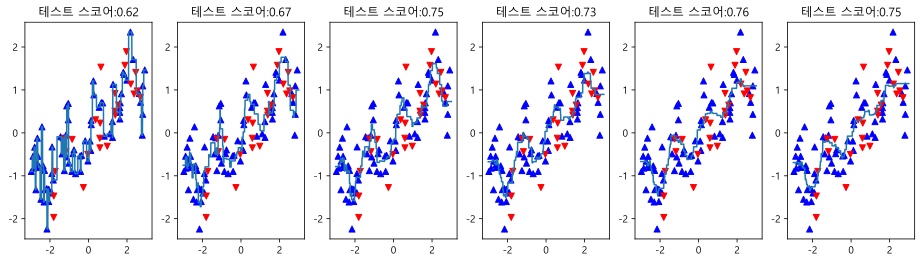

In [34]:
fig, axs = plt.subplots(1, 6, figsize=(16, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for ax, n in zip(axs, [1, 3, 5, 7, 9, 11]):
    reg = KNeighborsRegressor(n_neighbors=n)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.scatter(X_train, y_train, marker='^', color='blue')
    ax.scatter(X_test, y_test, marker='v', color='red')
    ax.set_title(f'테스트 스코어:{reg.score(X_test, y_test):.2f}')

w[0]: 0.393906  b: -0.031804


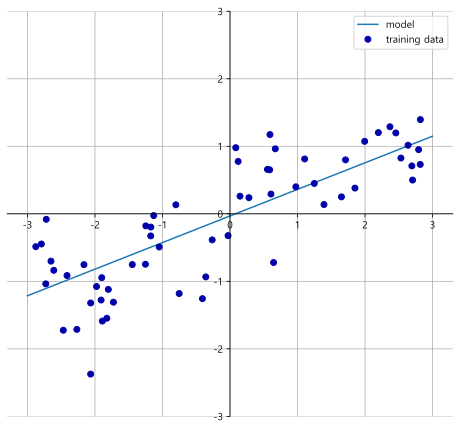

In [35]:
mglearn.plots.plot_linear_regression_wave()

In [36]:
X, y = mglearn.datasets.make_wave(n_samples=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [37]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [38]:
lr.coef_, lr.intercept_

(array([0.40443939]), -0.022568028173365326)

In [39]:
lr.score(X_test, y_test)

0.6599448011276341

In [40]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [41]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [42]:
lr.score(X_test, y_test)

0.6074721959665842

In [43]:
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [44]:
ridge.score(X_test, y_test)

0.7527683481744758

In [45]:
ridge_list = []
for alpha in [0.01, 0.1, 0.5, 1]:
    ridge = Ridge(alpha=alpha).fit(X_train, y_train)
    ridge_list.append(ridge.score(X_test, y_test))
ridge_list

[0.7022485939223496,
 0.7722067936480156,
 0.7675638302587835,
 0.7527683481744758]

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

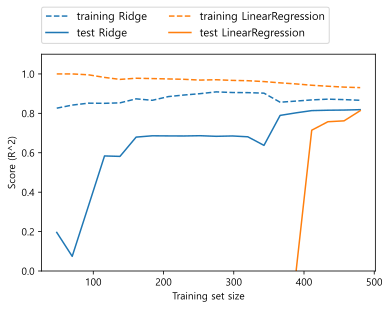

In [46]:
mglearn.plots.plot_ridge_n_samples()

In [47]:
lasso = Lasso().fit(X_train, y_train)
lasso.score(X_test, y_test)

0.20937503255272272

In [48]:
np.sum(lasso.coef_ != 0)

4

In [49]:
lasso = Lasso(alpha=0.01, max_iter=50000).fit(X_train, y_train)
lasso.score(X_test, y_test), np.sum(lasso.coef_ != 0)

(0.7656571174549981, 33)

In [50]:
pred_up = QuantileRegressor(quantile=0.9, alpha=0.01).fit(X_train, y_train)

In [51]:
pred_up.predict(X_test), pred_up.score(X_test, y_test)

(array([29.52189123, 24.73668029, 29.88197664, 18.11947255, 26.5122543 ,
        22.18383748, 22.44461851, 24.01330039, 20.43138649, 25.49478785,
        21.18689591, 25.93963719, 24.18140027, 14.12900202, 44.68343136,
        36.82666459, 24.70486557, 39.68655294, 31.86767562, 24.43973102,
        28.00578784, 27.02950495, 23.00327066, 30.41488131, 24.59192306,
        15.29889107, 22.0405329 , 25.42141779, 45.43661316, 25.53914974,
        23.07561219, 22.9697235 , 26.56682357, 27.50689456, 30.27402535,
        21.30801021, 20.31731017, 22.7078664 , 24.25628295, 21.88523322,
        28.75352774, 24.48862111, 27.94420292, 18.75833649, 31.44245443,
        29.49244635, 25.47044424, 28.03766879, 19.55882675, 28.14596928,
        28.20464069, 21.72100385, 26.3332432 , 46.60335368, 19.72374372,
        26.42314295, 24.99131553, 24.32951291, 21.82527554, 24.24940439,
        25.4528289 , 26.12334708, 35.72359282, 31.58546034, 20.78801935,
        32.65347611, 26.52115384, 28.78253626, 27.7

In [52]:
X, y = mglearn.datasets.make_forge()

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


C:\Users\admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


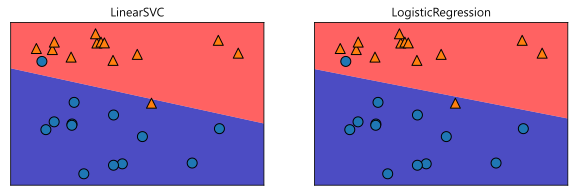

In [53]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(C=10, max_iter=5000), LogisticRegression()], axs):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, alpha=0.7, ax=ax)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)

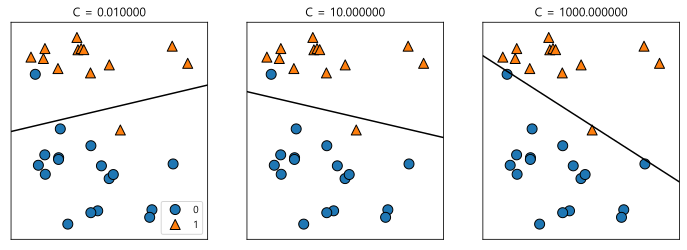

In [54]:
mglearn.plots.plot_linear_svc_regularization()

In [55]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], stratify=cancer['target'], random_state=42)

In [56]:
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)

In [57]:
logreg.score(X_train, y_train), logreg.score(X_test, y_test)

(0.9577464788732394, 0.958041958041958)

In [58]:
logreg100 = LogisticRegression(C=100, max_iter=5000).fit(X_train, y_train)
logreg100.score(X_train, y_train), logreg100.score(X_test, y_test)

(0.9835680751173709, 0.972027972027972)

In [59]:
logreg.coef_, logreg100.coef_

(array([[ 0.71261467,  0.13134418, -0.28269783,  0.02723636, -0.15098479,
         -0.20850032, -0.42820289, -0.21225829, -0.25722787, -0.0411373 ,
         -0.05319217,  1.15347107,  0.16309809, -0.1024768 , -0.01949006,
          0.0221187 , -0.05990806, -0.03041842, -0.04055622,  0.00638917,
         -0.00544052, -0.38220014, -0.08085248, -0.01427743, -0.28821378,
         -0.80780444, -1.30292728, -0.48276321, -0.72183255, -0.11126676]]),
 array([[ 3.27404139e+00,  1.51438793e-01, -3.53156034e-01,
         -4.30457662e-03, -4.44966849e+00,  9.61758924e-01,
         -3.13760691e+00, -6.56201873e+00, -5.40761941e+00,
          4.33909355e-01,  7.85880626e-01,  3.17551896e+00,
         -4.17924174e-01, -1.31838468e-01, -6.41780363e-01,
          6.30193637e+00,  8.22080953e+00, -3.72941878e-01,
          1.10059328e+00,  1.04142212e+00,  8.54270173e-01,
         -5.40877712e-01,  8.38174306e-02, -2.62314086e-02,
         -8.39805280e+00,  1.05629745e+00, -4.10208084e+00,
         -1.3

([<matplotlib.axis.XTick at 0x27a0f18bbb0>,
 [Text(0, 0, 'mean radius'),
  Text(1, 0, 'mean texture'),
  Text(2, 0, 'mean perimeter'),
  Text(3, 0, 'mean area'),
  Text(4, 0, 'mean smoothness'),
  Text(5, 0, 'mean compactness'),
  Text(6, 0, 'mean concavity'),
  Text(7, 0, 'mean concave points'),
  Text(8, 0, 'mean symmetry'),
  Text(9, 0, 'mean fractal dimension'),
  Text(10, 0, 'radius error'),
  Text(11, 0, 'texture error'),
  Text(12, 0, 'perimeter error'),
  Text(13, 0, 'area error'),
  Text(14, 0, 'smoothness error'),
  Text(15, 0, 'compactness error'),
  Text(16, 0, 'concavity error'),
  Text(17, 0, 'concave points error'),
  Text(18, 0, 'symmetry error'),
  Text(19, 0, 'fractal dimension error'),
  Text(20, 0, 'worst radius'),
  Text(21, 0, 'worst texture'),
  Text(22, 0, 'worst perimeter'),
  Text(23, 0, 'worst area'),
  Text(24, 0, 'worst smoothness'),
  Text(25, 0, 'worst compactness'),
  Text(26, 0, 'worst concavity'),
  Text(27, 0, 'worst concave points'),
  Text(28, 0, 'w

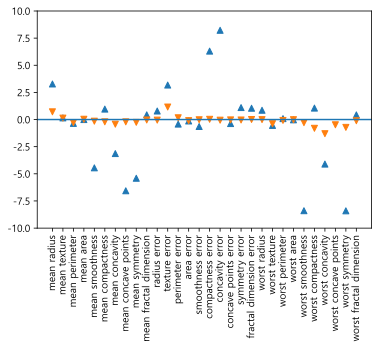

In [60]:
plt.plot(logreg100.coef_.T, '^', label='C=100')
plt.plot(logreg.coef_.T, 'v', label='C=1')
plt.ylim(-10, 10)
xlims = plt.xlim()
plt.hlines(0, plt.xlim()[0], plt.xlim()[1])
plt.xlim(xlims)
plt.xticks(range(cancer['data'].shape[1]), cancer['feature_names'], rotation=90)

In [61]:
logregl1 = LogisticRegression(C=10, penalty='l1', solver='liblinear', max_iter=5000).fit(X_train, y_train)
logregl1.score(X_train, y_train), logregl1.score(X_test, y_test)

(0.9788732394366197, 0.972027972027972)

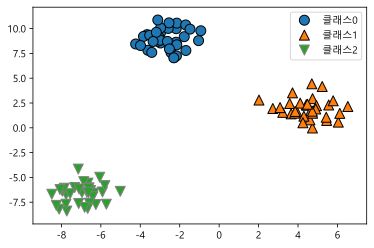

In [62]:
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(['클래스0', '클래스1', '클래스2'])

In [63]:
linear_svm = LinearSVC().fit(X, y)
linear_svm.coef_, linear_svm.intercept_

(array([[-0.17492186,  0.23141361],
        [ 0.47621865, -0.06937371],
        [-0.18914502, -0.20399659]]),
 array([-1.07745259,  0.13140765, -0.08604865]))

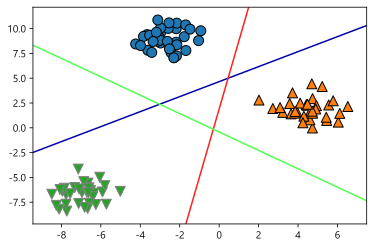

In [64]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], color=color)

In [65]:
-(line * coef[0] + intercept) / coef[1]

array([ 13.48614046,  12.91846885,  12.35079723,  11.78312561,
        11.215454  ,  10.64778238,  10.08011077,   9.51243915,
         8.94476753,   8.37709592,   7.8094243 ,   7.24175268,
         6.67408107,   6.10640945,   5.53873784,   4.97106622,
         4.4033946 ,   3.83572299,   3.26805137,   2.70037975,
         2.13270814,   1.56503652,   0.99736491,   0.42969329,
        -0.13797833,  -0.70564994,  -1.27332156,  -1.84099318,
        -2.40866479,  -2.97633641,  -3.54400802,  -4.11167964,
        -4.67935126,  -5.24702287,  -5.81469449,  -6.3823661 ,
        -6.95003772,  -7.51770934,  -8.08538095,  -8.65305257,
        -9.22072419,  -9.7883958 , -10.35606742, -10.92373903,
       -11.49141065, -12.05908227, -12.62675388, -13.1944255 ,
       -13.76209712, -14.32976873])

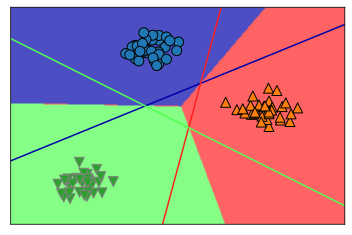

In [66]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=0.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], color=color)

In [67]:
sgdc = SGDClassifier(alpha=0.01, learning_rate='adaptive', eta0=0.1, random_state=42, n_jobs=-1)
sgdc.fit(X, y)

SGDClassifier(alpha=0.01, eta0=0.1, learning_rate='adaptive', n_jobs=-1,
              random_state=42)

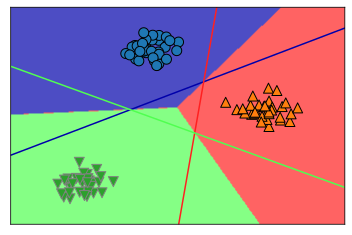

In [68]:
mglearn.plots.plot_2d_classification(sgdc, X, fill=True, alpha=0.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(sgdc.coef_, sgdc.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], color=color)

In [69]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [70]:
sgdr = SGDRegressor(learning_rate='adaptive', eta0=0.01, random_state=42)
sgdr.fit(X_train, y_train)

SGDRegressor(learning_rate='adaptive', random_state=42)

In [71]:
sgdr.score(X_train, y_train), sgdr.score(X_test, y_test)

(0.8789335196678935, 0.7481679418987965)

In [72]:
X = np.array([[0, 1, 0, 1],
             [1, 0, 1, 1],
              [0, 0, 0, 1],
             [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [73]:
counts = {}
for label in np.unique(y):
    counts[label] = X[y == label].sum(axis=0)
counts

{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}

In [74]:
X[y == 0]

array([[0, 1, 0, 1],
       [0, 0, 0, 1]])

In [75]:
rng = np.random.RandomState(50)
num_data = 50
num_feature = 10
X = rng.randint(5, size=(num_data, num_feature))
y = rng.randint(6, size=num_data)
y

array([4, 5, 0, 0, 0, 5, 5, 3, 4, 1, 2, 0, 5, 1, 3, 4, 3, 1, 0, 1, 1, 3,
       0, 5, 4, 1, 4, 4, 4, 4, 2, 1, 3, 2, 1, 5, 3, 0, 1, 1, 3, 5, 3, 2,
       4, 1, 4, 1, 1, 4])

In [76]:
clf = MultinomialNB(alpha=0.8)
clf.fit(X, y)

MultinomialNB(alpha=0.8)

In [77]:
clf.predict(X), clf.score(X, y)

(array([4, 5, 4, 0, 0, 0, 1, 3, 3, 3, 2, 0, 5, 1, 4, 0, 3, 1, 1, 1, 4, 1,
        2, 3, 1, 3, 4, 4, 4, 5, 0, 1, 1, 5, 4, 2, 3, 0, 1, 1, 3, 3, 3, 1,
        0, 0, 3, 0, 1, 4]),
 0.48)

In [80]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], stratify=cancer['target'], random_state=42)

In [85]:
treeclf = DecisionTreeClassifier(max_depth=4, random_state=0).fit(X_train, y_train)

In [86]:
treeclf.score(X_train, y_train), treeclf.score(X_test, y_test)

(0.9882629107981221, 0.951048951048951)

[Text(0.5735294117647058, 0.9, 'worst radius <= 16.795\nsamples = 426\nvalue = [159, 267]\nclass = 양성'),
 Text(0.3235294117647059, 0.7, 'worst concave points <= 0.136\nsamples = 284\nvalue = [25, 259]\nclass = 양성'),
 Text(0.17647058823529413, 0.5, 'radius error <= 1.048\nsamples = 252\nvalue = [4, 248]\nclass = 양성'),
 Text(0.11764705882352941, 0.3, 'smoothness error <= 0.003\nsamples = 251\nvalue = [3, 248]\nclass = 양성'),
 Text(0.058823529411764705, 0.1, 'samples = 4\nvalue = [1, 3]\nclass = 양성'),
 Text(0.17647058823529413, 0.1, 'samples = 247\nvalue = [2, 245]\nclass = 양성'),
 Text(0.23529411764705882, 0.3, 'samples = 1\nvalue = [1, 0]\nclass = 약성'),
 Text(0.47058823529411764, 0.5, 'worst texture <= 25.62\nsamples = 32\nvalue = [21, 11]\nclass = 약성'),
 Text(0.35294117647058826, 0.3, 'worst smoothness <= 0.179\nsamples = 12\nvalue = [3, 9]\nclass = 양성'),
 Text(0.29411764705882354, 0.1, 'samples = 10\nvalue = [1, 9]\nclass = 양성'),
 Text(0.4117647058823529, 0.1, 'samples = 2\nvalue = [2, 

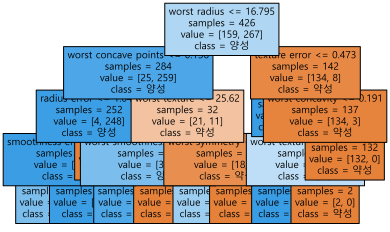

In [100]:
plot_tree(treeclf, class_names=['약성', '양성'], feature_names=cancer['feature_names'], impurity=False,
          filled=True, fontsize=10)

In [105]:
treeclf.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01019737, 0.04839825, 0.        , 0.        , 0.0024156 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.72682851, 0.0458159 , 0.        , 0.        , 0.0141577 ,
       0.        , 0.018188  , 0.1221132 , 0.01188548, 0.        ])

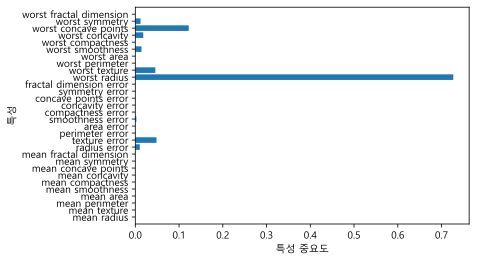

In [108]:
def plot_feature_importances(dataset, model):
    n_features = dataset['data'].shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), dataset['feature_names'])
    plt.xlabel('특성 중요도')
    plt.ylabel('특성')
    plt.ylim(-1, n_features)
plot_feature_importances(cancer, treeclf)

In [110]:
cancer['data'].shape

(569, 30)

In [122]:
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, 'ram_price.csv'), index_col=0)
ram_prices

,date,price
0,1957.00,4.110418e+08
1,1959.00,6.794772e+07
2,1960.00,5.242880e+06
3,1965.00,2.642412e+06
4,1970.00,7.340030e+05
...,...,...
328,2015.58,4.500000e-03
329,2015.67,4.300000e-03
330,2015.75,4.200000e-03
331,2015.83,3.800000e-03


In [123]:
data_train = ram_prices[ram_prices['date'] < 2000]
data_test = ram_prices[ram_prices['date'] >= 2000]

In [134]:
X_train = data_train['date'].to_numpy()[:, np.newaxis]
y_train = np.log(data_train['price']).to_numpy()
treereg = DecisionTreeRegressor().fit(X_train, y_train)
linearreg = LinearRegression().fit(X_train, y_train)

In [135]:
X_all = ram_prices['date'].to_numpy()[:, np.newaxis]

In [136]:
pred_tree = treereg.predict(X_all)
pred_lr = linearreg.predict(X_all)

In [137]:
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

In [138]:
price_tree

array([4.11041792e+08, 6.79477250e+07, 5.24288000e+06, 2.64241200e+06,
       7.34003000e+05, 3.99360000e+05, 3.14573000e+05, 4.21888000e+05,
       1.80224000e+05, 6.75840000e+04, 4.99200000e+04, 4.07040000e+04,
       4.89600000e+04, 2.30400000e+04, 3.20000000e+04, 3.68000000e+04,
       2.80000000e+04, 2.94400000e+04, 1.92000000e+04, 2.40000000e+04,
       1.60000000e+04, 1.52000000e+04, 1.05280000e+04, 6.70400000e+03,
       6.48000000e+03, 8.80000000e+03, 4.47900000e+03, 3.52000000e+03,
       4.46400000e+03, 1.98000000e+03, 2.39600000e+03, 1.98000000e+03,
       1.37900000e+03, 1.33100000e+03, 8.80000000e+02, 7.20000000e+02,
       5.50000000e+02, 4.20000000e+02, 3.50000000e+02, 3.00000000e+02,
       3.00000000e+02, 3.00000000e+02, 3.00000000e+02, 3.00000000e+02,
       3.00000000e+02, 3.00000000e+02, 1.90000000e+02, 1.90000000e+02,
       1.90000000e+02, 1.90000000e+02, 1.90000000e+02, 1.90000000e+02,
       1.90000000e+02, 1.76000000e+02, 1.76000000e+02, 1.57000000e+02,
      